In [1]:
import os 
import numpy as np 
import nibabel as nib 
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cv2

In [2]:
bone = nib.load("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_original_resolution/data/images/clipped_masked_out_BONE/masked_COPDGene_B05639_BONE.nii.gz").get_fdata()
std = nib.load("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_original_resolution/data/images/clipped_masked_out_STANDARD/masked_COPDGene_B05639_STANDARD.nii.gz").get_fdata()

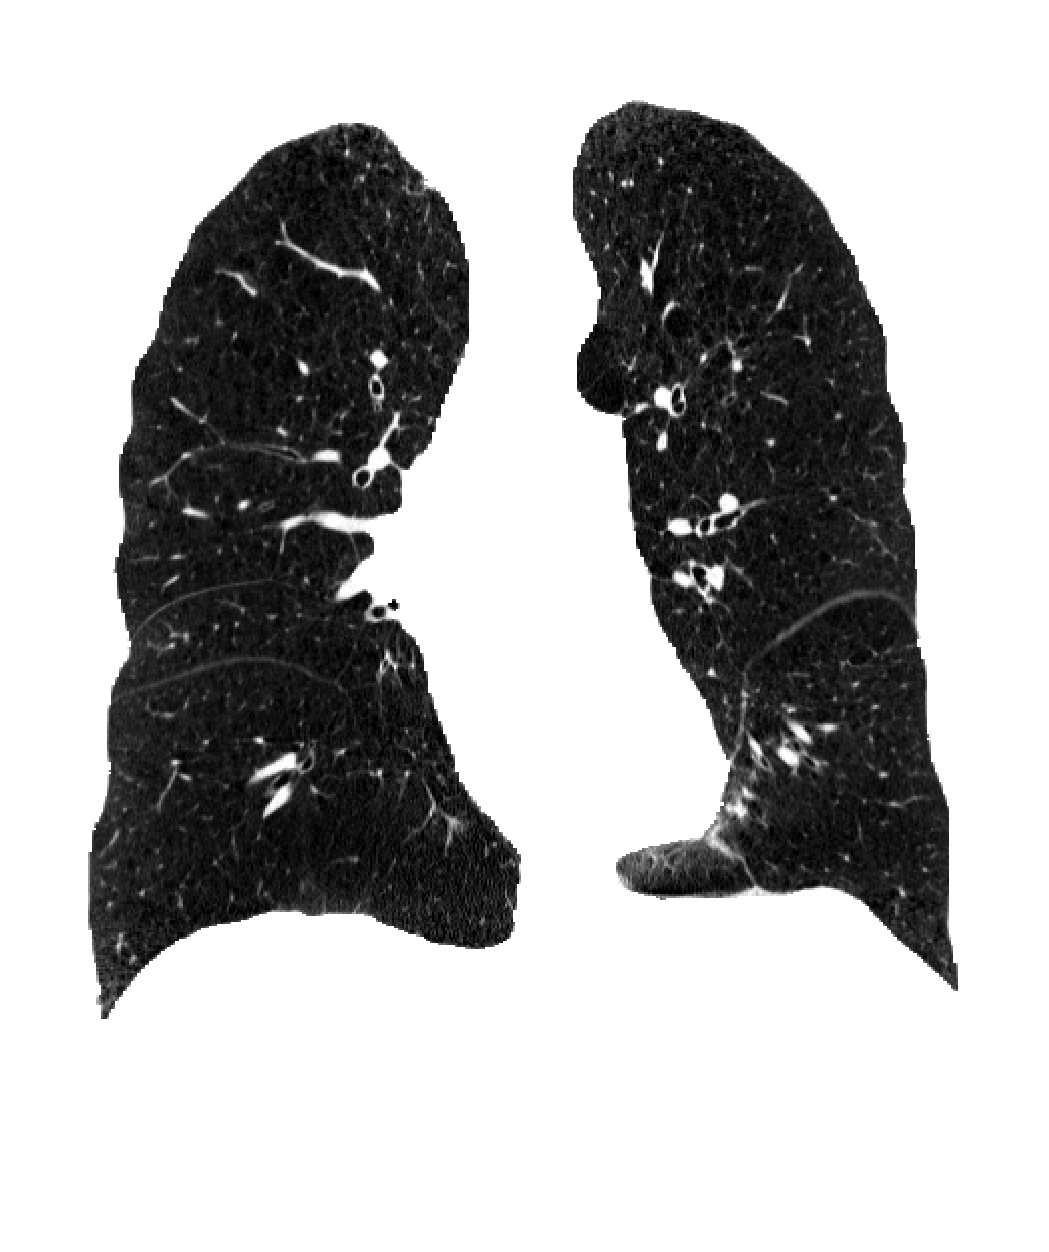

In [9]:
bonex,boney,bonez = bone.shape
stdx,stdy,stdz = std.shape

#Plot coronal view 
plt.figure(figsize=(16,16))
plt.imshow(np.rot90(bone[:,boney//2,:]),cmap='gray', vmin=-1024, vmax=0)
plt.axis('off')
plt.savefig("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/SPIE_paper_figures/SPIE_2025_poster/BONE_datafig.tiff", dpi=300, format='tiff')
plt.show()

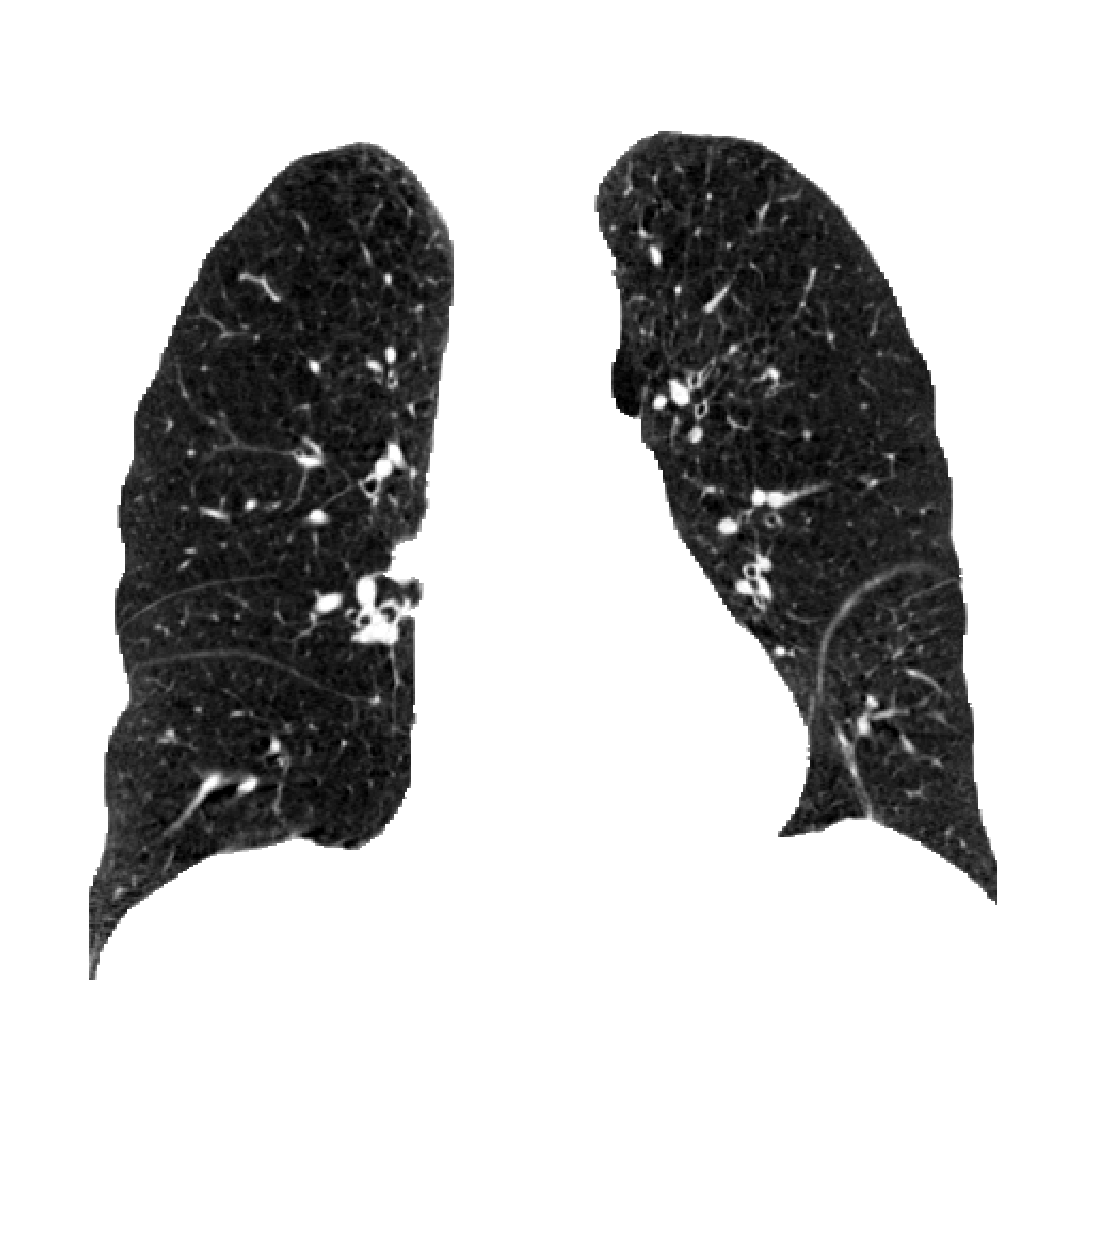

In [10]:
plt.figure(figsize=(16,16))
plt.imshow(np.rot90(std[:,stdy//2,:]),cmap='gray', vmin=-1024, vmax=0)
plt.axis('off')
plt.savefig("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/SPIE_paper_figures/SPIE_2025_poster/STANDARD_datafig.tiff", dpi=300, format='tiff')
plt.show()

In [ ]:
#Images for 3 minute poster presentation: 
#bone:  COPDGene_B15777_BONE
#Standard: COPDGene_B15777_STANDARD
#harmonized: COPDGene_B15777_BONE 
#Overlay images with emphysema to show how hamronization works. 
#Show the original images and show how registration can be done 

In [ ]:
def overlay_mask(image, mask, color=(255, 0, 0), alpha=1.0):
    # Convert image to uint8
    image_uint8 = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    
    # Convert grayscale image to BGR
    image_bgr = cv2.cvtColor(image_uint8, cv2.COLOR_GRAY2BGR)
    
    # Create a color mask
    color_mask = np.zeros_like(image_bgr)
    color_mask[mask == 1] = color
    
    # Overlay the color mask on the image
    overlay = cv2.addWeighted(image_bgr, 1, color_mask, alpha, 0)
    return overlay

def save_image(image, filename):
    plt.figure(figsize = (16,16))
    plt.imshow(image)
    plt.axis('off')
    plt.savefig(filename, bbox_inches='tight', pad_inches=0, dpi=300, format='tiff')
    plt.close()

def save_image_only(image, filename):
    plt.figure(figsize = (16,16))
    plt.imshow(image, cmap="gray", vmax=0, vmin=-1000)
    plt.axis('off')
    plt.savefig(filename, bbox_inches='tight', pad_inches=0, dpi=300, format='tiff')
    plt.close()

In [17]:
bone = nib.load("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/val_test/inspiratory_BONE/COPDGene_B15777_BONE_control.nii.gz").get_fdata()
std = nib.load("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/val_test/expiratory_STANDARD/COPDGene_B15777_STANDARD_control.nii.gz").get_fdata()
harm_bone = nib.load("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/experiments/insp_exp_run1_results_cycleGAN/cycleGAN_epoch5_results/COPDGene_B15777_BONE_control.nii.gz").get_fdata()

bone_emph_mask = nib.load("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/val_test/insp_BONE_emphysema/emphysema/COPDGene_B15777_BONE_control.nii.gz").get_fdata()
std_emph_mask = nib.load("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/val_test/exp_STANDARD_emphysema/emphysema/COPDGene_B15777_STANDARD_control.nii.gz").get_fdata()
harm_bone_emph_mask = nib.load("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/experiments/insp_exp_run1_results_cycleGAN/harmonized_emphysema_epoch5/emphysema/COPDGene_B15777_BONE_control.nii.gz").get_fdata()

bonex, boney, bonez = bone.shape
stdx, stdy, stdz = std.shape
harmx, harmy, harmz = harm_bone.shape

boneemphx, boneemphy, bonemepmhz = bone_emph_mask.shape
stdmemphx, stdmemphy, stdmemphz = std_emph_mask.shape
harmemphx, harmemphy, harmemphz = harm_bone_emph_mask.shape

rot_bone = np.rot90(bone[:,boney//2,:])
rot_std = np.rot90(std[:,stdy//2,:])
rot_harm_bone = np.rot90(harm_bone[:,harmy//2,:])

rot_bone_emph = np.rot90(bone_emph_mask[:,boneemphy//2,:])
rot_std_emph = np.rot90(std_emph_mask[:,stdmemphy//2,:])
rot_harm_bone_emph = np.rot90(harm_bone_emph_mask[:,harmemphy//2,:])

In [19]:
#get the clipped images for the purpose of registration 
bone_insp = nib.load("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_original_resolution/data/images/clipped_masked_out_BONE/masked_COPDGene_B15777_BONE_control.nii.gz").get_fdata()
std_exp = nib.load("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_original_resolution/data/images/clipped_masked_out_STANDARD/masked_COPDGene_B15777_STANDARD_control.nii.gz").get_fdata()
exptoinsp_reg = nib.load("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_original_resolution/non_harmonized/SyN_exptoinsp/masked_COPDGene_B15777_STANDARD_control.nii.gz").get_fdata()

inspx, inspy, inspz = bone_insp.shape
expx, expy, expz = std_exp.shape
regx, regy, regz = exptoinsp_reg.shape

rot_bone_insp = np.rot90(bone_insp[:,inspy//2,:])
rot_std_exp = np.rot90(std_exp[:,expy//2,:])
rot_exptoinsp_reg = np.rot90(exptoinsp_reg[:,regy//2,:])

#Overlay images with emphysema to show how hamronization works.


In [ ]:
#Save images for emphysema. Save images for registration.
save_image(overlay_mask(rot_bone, rot_bone_emph), "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/SPIE_paper_figures/SPIE_3minute_poster/BONE_emphysema.tiff")
save_image(overlay_mask(rot_std, rot_std_emph), "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/SPIE_paper_figures/SPIE_3minute_poster/STANDARD_emphysema.tiff")
save_image(overlay_mask(rot_harm_bone, rot_harm_bone_emph), "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/SPIE_paper_figures/SPIE_3minute_poster/HARMONIZED_emphysema.tiff")

save_image_only(rot_bone_insp, "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/SPIE_paper_figures/SPIE_3minute_poster/BONE_insp.tiff")
save_image_only(rot_std_exp, "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/SPIE_paper_figures/SPIE_3minute_poster/STANDARD_exp.tiff")
save_image_only(rot_exptoinsp_reg, "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/SPIE_paper_figures/SPIE_3minute_poster/STANDARD_exp_to_BONE_insp_reg.tiff")